## Euler's Method Simulating the Ball Falling

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

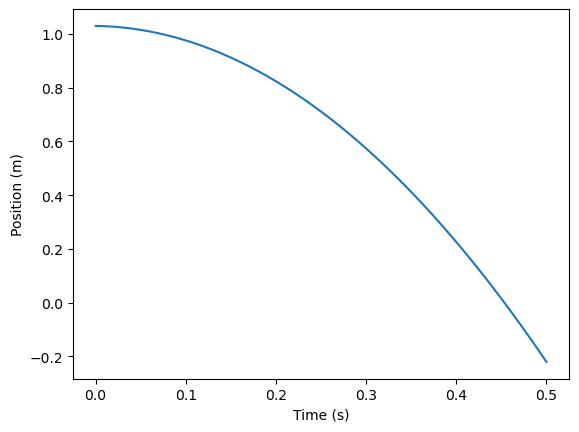

In [68]:
# Initial position and velocity
y = 1.03
v = 0

# Mass of the ball
mass = 0.0027 #kilograms

# Time step
dt = 0.01

# Acceleration due to gravity
g = -9.81

# Lists to store position and time values for plotting
y_list = [y]
t_list = [0]

# Initial energy
pot_energy_arr = [abs(mass * g * y)] #joules
kin_energy_arr = [0]


# Number of time steps to simulate
n = 50

# Euler's method loop
for i in range(1, n+1):
    # Update velocity
    v = v + g*dt
    # Update position
    y = y + v*dt
    # Append values to lists for plotting
    y_list.append(y)
    t_list.append(i*dt)
    
    # calculate energy
    pot_energy = mass * -g * y #joules
    kin_energy = 0.5 * mass * (v ** 2) #
    
    # append to arrays
    pot_energy_arr.append(pot_energy)
    kin_energy_arr.append(kin_energy)

# Plot the results
plt.plot(t_list, y_list)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

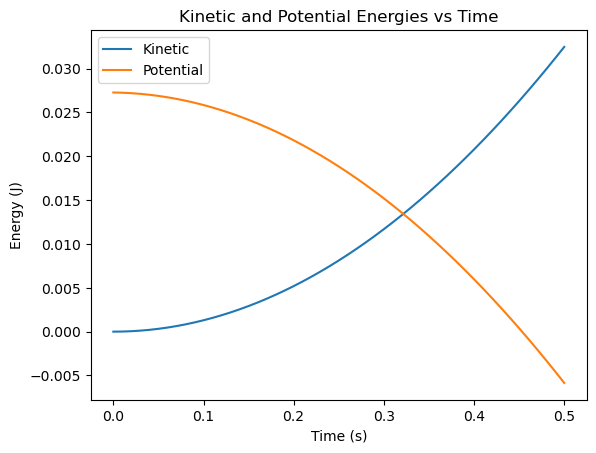

In [70]:
# Plotting energies
plt.title("Kinetic and Potential Energies vs Time")
plt.plot(t_list, kin_energy_arr, label="Kinetic")
plt.plot(t_list, pot_energy_arr, label="Potential")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

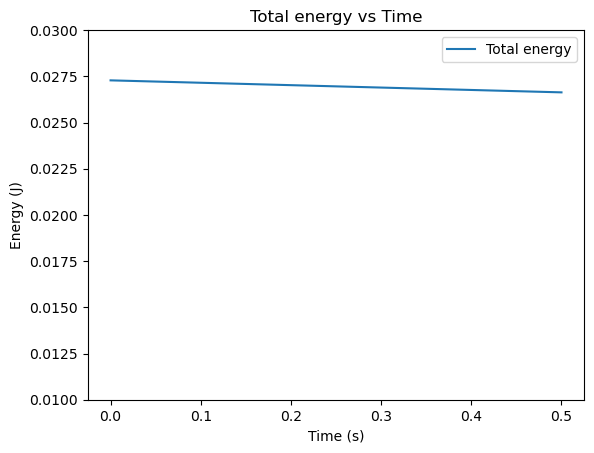

In [77]:
# Plotting total energy
total_energy = np.array(kin_energy_arr) + np.array(pot_energy_arr)
plt.title("Total energy vs Time")
plt.plot(t_list, total_energy, label="Total energy")
plt.ylim([0.01, 0.03])
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

## Reading experimental data

In [8]:
df = pd.read_csv('experimental_data.csv', encoding = 'unicode_escape')  

exp_y = df.iloc[:,1].to_numpy()[13:]
exp_t = df.iloc[:,0].to_numpy()[13:]

In [12]:
exp_t = exp_t - 0.433
exp_t

array([0.   , 0.034, 0.067, 0.1  , 0.134, 0.167, 0.2  , 0.234, 0.267,
       0.3  , 0.334, 0.367, 0.4  ])

## Plotting experimental data and simulation results

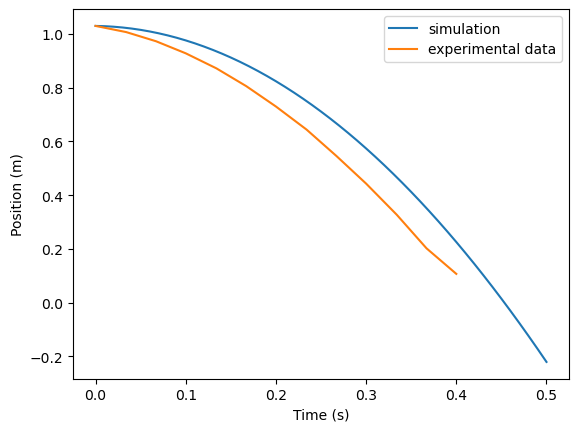

In [45]:
# Plot experimental data and simulation points
plt.plot(t_list, y_list, label = "simulation")
plt.plot(exp_t, exp_y, label = "experimental data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

## Plotting error

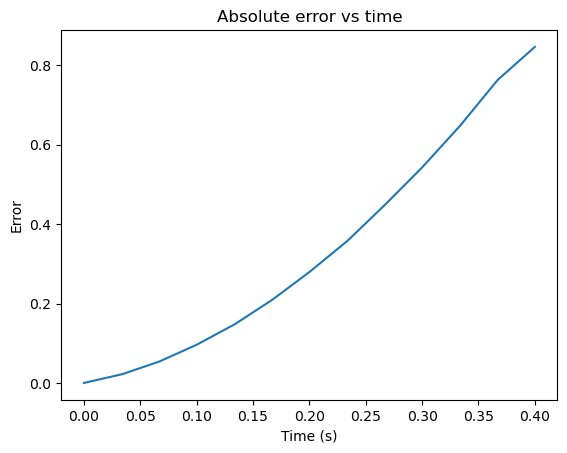

In [46]:
#converting list to numpy array
sim_y = np.array(y_list)

#define error as simulation point - experimental point
error = np.empty(len(exp_y))
error_prop = np.empty(len(exp_y))

#turn absolute error into relative error
for i in range(len(exp_y)):
    error[i] = sim_y[i] - exp_y[i]
    error_prop[i] = (error[i]/exp_y[i]) * 100
 
    
# plotting absolute error
plt.plot(exp_t, error)
plt.title("Absolute error vs time")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.show()

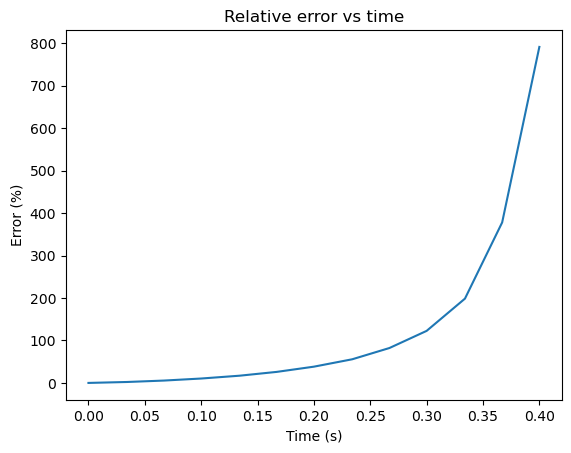

In [49]:
# plotting absolute error
plt.plot(exp_t, error_prop)
plt.title("Relative error vs time")
plt.xlabel("Time (s)")
plt.ylabel("Error (%)")
plt.show()

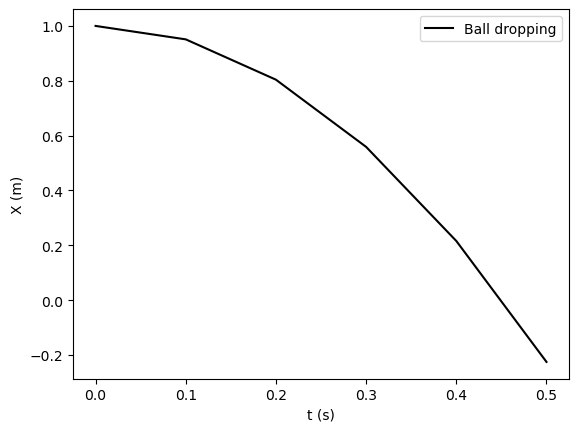

In [24]:
import numpy as np
import matplotlib.pyplot as pl

# set parameters
g = 9.8
X0 = 1
V0 = 0
dt  = 0.1
tfinal = 0.5

# initialize arrays
t = np.arange(0.,tfinal+dt,dt)
npoints = len(t)
X = np.zeros(npoints)
V = np.zeros(npoints)
XExact = X0 + V0*t - 0.5*g*t**2

# SECOND ORDER RUNGE_KUTTA SOLUTION
X[0] = X0
V[0] = V0
for i in range(npoints-1):
    # compute midpoint velocity
    Vmid = V[i] - 0.5*g*dt  
    
    # use midpoint velocity to advance position
    X[i+1] = X[i] + Vmid*dt
    V[i+1] = V[i] - g*dt

# plot the results
pl.ion()
pl.plot(t,XExact,'k',label='Ball dropping')
pl.xlabel('t (s)')
pl.ylabel('X (m)')
pl.legend()

A few differences but overall very similar to real life data


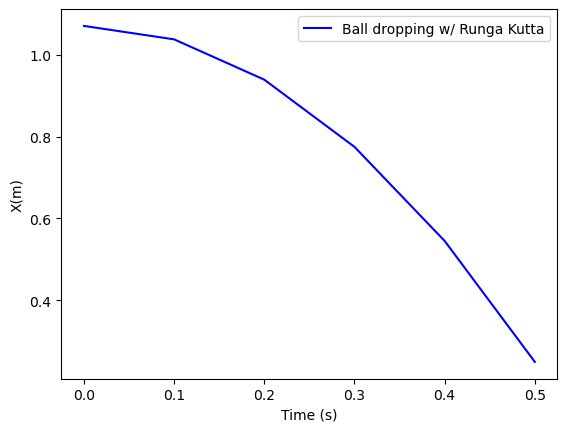

In [39]:
import numpy as np
import matplotlib.pyplot as plt


#4th order Runga-Kutta simulation
#parameters
g = 9.8
X0 = 1
V0 = 0
h = 0.2
dt  = 0.1
t_final = 0.5
steps = 4



t = np.arange(0,tfinal+dt,dt)
npoints = len(t)
X = np.zeros(npoints)
V = np.zeros(npoints)

drop = X0 + V0*t - 0.5*g*t**2

def dy_dx(x, y):
    return ((x - y))
    return x + V0*t - 0.5*g*t**2
  
def rungeKutta(xInt, y0, x, h, steps):
    n = steps
   
    y = y0
    for i in range(1, n + 1):           #for many iterations
        rk4_1 = h * dy_dx(xInt, y)
        rk4_2 = h * dy_dx(xInt + 0.5 * h, y + 0.5 * rk4_1)
        rk4_3 = h * dy_dx(xInt + 0.5 * h, y + 0.5 * rk4_2)
        rk4_4 = h * dy_dx(xInt + h, y + rk4_3)
 
        y = y + (1.0 / 6.0)*(rk4_1 + 2 * rk4_2 + 2 * rk4_3 + rk4_4)
        #yArray.append(i)
 
        #position value updated
        xInt = xInt + h
    return y

print("A few differences but overall very similar to real life data")
plt.plot(t, rungeKutta(X0, drop, h, dt, 4), label="Ball dropping w/ Runga Kutta", color = "blue")
plt.xlabel("Time (s)")
plt.ylabel("X(m)")
plt.legend()
plt.show()